In [2]:

import torch.nn as nn
import os
import torch.nn.functional as F
from collections import Counter
from torchvision import transforms, datasets
import torchvision
import torchmetrics
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
import torch
import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import CSVLogger
import time

In [3]:
BATCH_SIZE = 256
NUM_EPOCHS = 5
LEARNING_RATE = 0.01
NUM_WORKERS = 10 

In [4]:
train_dataset = datasets.CIFAR10(root = '../data', 
                                 train = True, 
                                 transform = transforms.ToTensor(), 
                                 download = True)

train_dataloader = DataLoader(train_dataset, 
                              batch_size = BATCH_SIZE, 
                              shuffle = True, 
                              num_workers = NUM_WORKERS, 
                              drop_last = True)

test_dataset = datasets.CIFAR10(root = '../data', 
                                train = False, 
                                transform = transforms.ToTensor(), 
                                download = True)

test_dataloader = DataLoader(test_dataset, 
                             batch_size = BATCH_SIZE, 
                             shuffle = False, 
                             num_workers = NUM_WORKERS, 
                             drop_last = True)

Files already downloaded and verified
Files already downloaded and verified


Image batch dimensions: torch.Size([256, 3, 32, 32])
Image label dimensions: torch.Size([256])


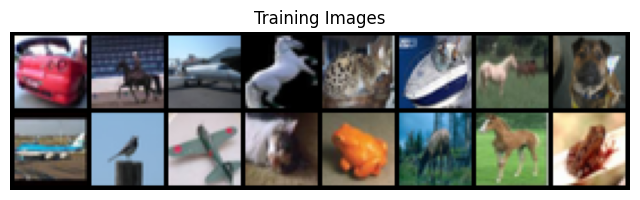

In [5]:
for images, labels in train_dataloader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

plt.figure(figsize = (8, 8))
plt.axis('off')
plt.title('Training Images')
plt.imshow(np.transpose(torchvision.utils.make_grid(images[:16], padding =2 , normalize = True), (1, 2, 0)))
plt.show()

In [ ]:
class DataModule(pl.LightningDataModule):
    def __init__(self, train_dataset, test_dataset, batch_size = 256, num_workers = 10):
        super(DataModule, self).__init__()
        
        self.train_dataset = train_dataset
        self.test_dataset = test_dataset
        self.batch_size = batch_size
        self.num_workers = num_workers
        
    def prepare_data(self):
        
        datasets.CIFAR10(root = '../data', 
                         transform = transforms.ToTensor(), 
                         download = True)
        
        self.train_transform = transforms.Compose([
           torchvision.transforms.ToTensor(),
           torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
            ])
        
        self.test_transform = transforms.Compose([
              torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
            ]) 
        return          
       
    def setup(self, stage = None):
        train = datasets.CIFAR10(root = '../data', 
                                 train = True, 
                                 transform = self.train_transform, 
                                 download = False)
        
        self.test = datasets.CIFAR10(root = '../data', 
                                    train = False, 
                                    transform = self.test_transform, 
                                    download = False)
        
        self.train_dataset, self.val_dataset = random_split(train, [45000, 5000])
        
        